# <font color="blue">DA514 - Homework Assignment 1</font>

Assigned: February 11th, 2021<br>
Due: **February 18th, 2021 23:55pm**

Please use this notebook for your answers. Add your charts/graphs/code where necessary. You can select the "Markdown" mode from the drop-down menu above and type your answer/reasoning there. It would be extra nice if you can use equations. The notebooks we provided have numerous examples. you can also check the following link for the Markdown formula: http://csrgxtu.github.io/2015/03/20/Writing-Mathematic-Fomulars-in-Markdown/

### Requirements (very important):
1. Please use **this notebook** to answer the questions. If you work on Colab, you can download your notebook and use it for submission.


2. Please name your notebook as **`lastName_firstName_HW1.ipynb`** and upload it to SuCourse+ on time.


3. Don't send your work in HTML format. Because we must be able to run your code if need be. Don't send it in the **`.py`** format either. They won't be processed.  


4. Please work alone.

# Predicting the onset of diabetes on Pima Indians within 5 years

The population for this study was the Pima Indian population near Phoenix, Arizona. The population has been under continuous study since 1965 by the National Institute of Diabetes and Digestive and Kidney Diseases because of its high incidence rate of diabetes.

For the purposes of this dataset, diabetes was diagnosed according to World Health Organization Criteria, which stated that if the 2 hour post-load glucose was at least 200 mg/dl at any survey exam or if the Indian Health Service Hospital serving the community found a glucose concentration of at least 200 mg/dl during the course of routine medical care.

Given the medical data we can gather about people, we should be able to make better predictions on how likely a person is to suffer the onset of diabetes, and therefore act appropriately to help.

This is a dataset to make predictions on whether a person is to suffer the diabetes given the 8 attributes. All patients in this dataset are females at least 21 years old of Pima Indian heritage. 

We have 537 instances in the train set (pima_train.csv) and 231 instances in the test set (pima_test.csv) with 8 attributes. 

**Pima Indians Diabetes Dataset attribute information:**

|Feature|Explanation|
|--|--|
|numpreg|Number of times pregnant|
|pgc|Plasma glucose concentration after 2 hours in an oral glucose tolerance test|
|bldpres|Diastolic blood pressure (mm Hg)|
|triceps|Triceps skin fold thickness (mm)|
|serumins|2-Hour serum insulin (mu U/ml)|
|bmi|Body mass index (weight in kg/(height in m)^2)|
|pedig|Diabetes pedigree function|
|age|Age (years)|
|target|Class variable (0 or 1) : 1 is interpreted as "tested positive" for diabetes|

A particularly interesting attribute used in the study was the Diabetes Pedigree Function, **pedi** which represents how likely they are to get the disease by extrapolating from their ancestor’s history. It provides information on diabetes mellitus history in relatives and the genetic relationship of those relatives to the patient. This measure of genetic influence gives us an idea of the hereditary risk one might have with the onset of diabetes mellitus.

### Questions:
Use a Logistic Regression classifier to predict the target in the test data. There are, however, missing values in the data files. Build your best model and identify the imputation method which gives you the highest classification accuracy. Try imputing the missing values by using:
1. mean/median imputation whichever is more appropriate
2. the predictive methods in the Iterative Imputer of scikit-learn   
3. a variable to indicate missingness

In [379]:
# Answer here
# importing libraries...
import timeit
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, RepeatedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [380]:
df = pd.read_csv('pima_train.csv')
df.head()

,numpreg,pgc,bldpres,triceps,serumins,bmi,pedig,age,target
0,4,151.0,90.0,38.0,NaN,29.7,0.294,36,0
1,4,116.0,72.0,12.0,87.0,22.1,0.463,37,0
2,6,92.0,62.0,32.0,126.0,32.0,0.085,46,0
3,9,57.0,80.0,37.0,NaN,32.8,0.096,41,0
4,3,81.0,86.0,16.0,66.0,27.5,0.306,22,0


target
0    350
1    187
dtype: int64


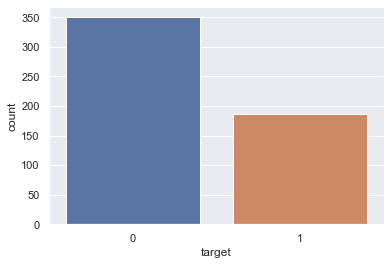

In [381]:
# Class distribution
print(df.groupby('target').size()) 

sns.countplot(df['target'],label="Count"); 

Out of 537 instances, number of customers have negative result is **350 (65.17%)**, positive result is **187 (34.82%)**. We have a somewhat unbalanced data set.


In [382]:
df.info() #there are missing values in many columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 9 columns):
numpreg     537 non-null int64
pgc         532 non-null float64
bldpres     512 non-null float64
triceps     391 non-null float64
serumins    294 non-null float64
bmi         527 non-null float64
pedig       537 non-null float64
age         537 non-null int64
target      537 non-null int64
dtypes: float64(6), int64(3)
memory usage: 37.9 KB


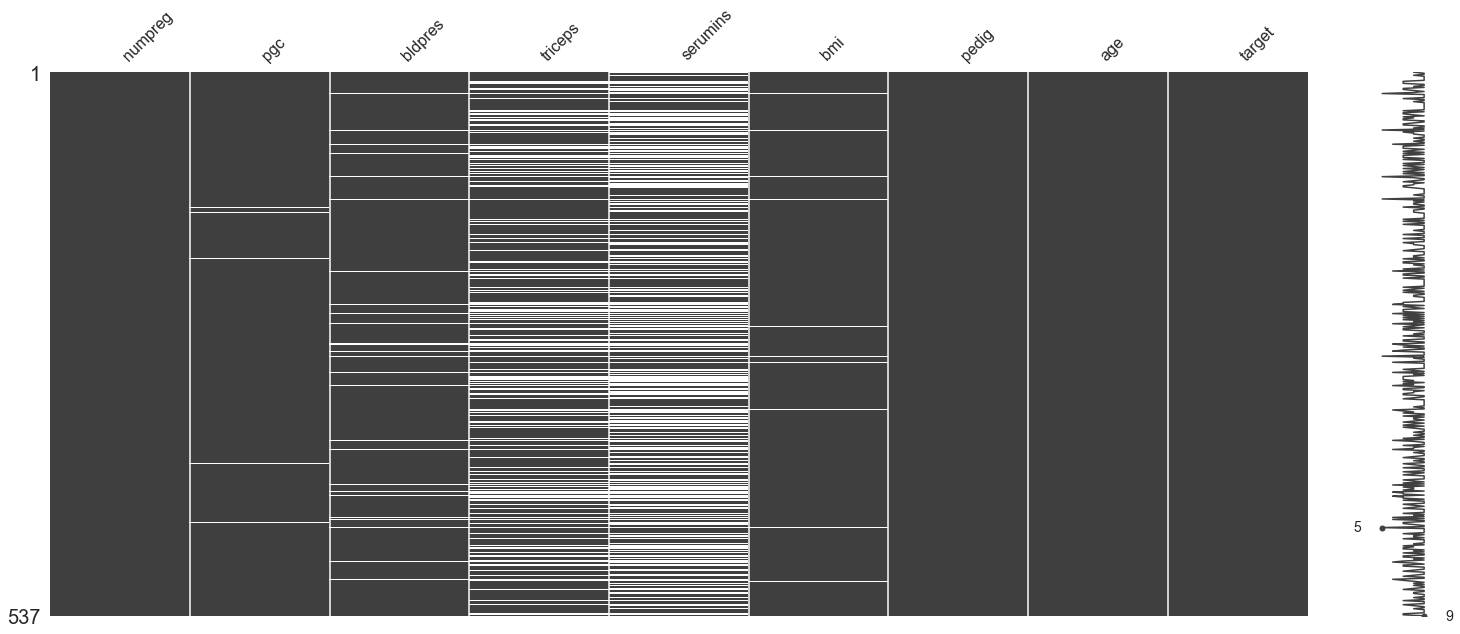

In [383]:
import missingno as msno
msno.matrix(df);

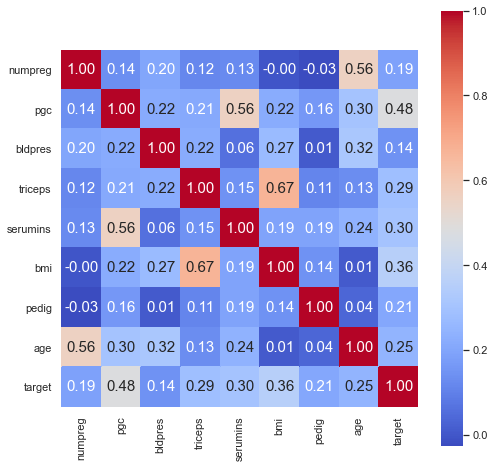

In [384]:
# Correlation matrix
corr = df.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr, cbar=True, square=True, annot=True, fmt='.2f',annot_kws={'size': 15},
           xticklabels=df.columns, yticklabels=df.columns, cmap= 'coolwarm')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

There is highly correlation between bmi and triceps 

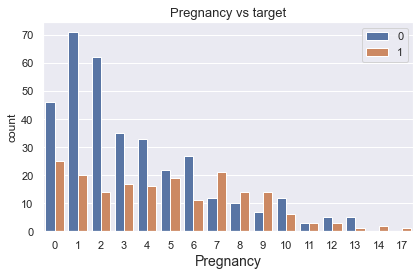

In [385]:
# Pregnancy rate vs target
sns.countplot('numpreg',hue='target',data=df)
plt.title('Pregnancy vs target', size=13)
plt.xlabel('Pregnancy', size=14)
plt.legend(loc='upper right')
plt.tight_layout()   
plt.show()

As the higher the number of pregnancies, the more likely it is to have diabetes especially in 7,8,9 children

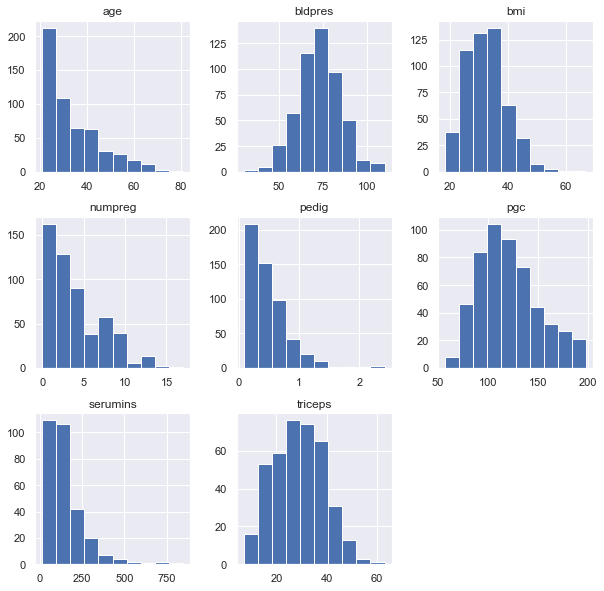

In [386]:
# distributions of attributes
cols=['numpreg', 'pgc', 'bldpres', 'triceps', 'serumins',
       'bmi', 'pedig', 'age']
df[cols].hist(figsize = [10,10]);

I controlled the distribution of features, these are generally right skewed. 

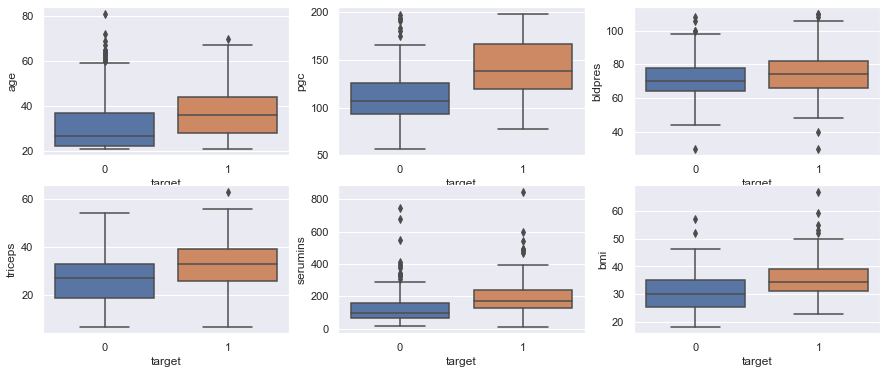

In [387]:
plt.figure(figsize=(15,6))
plt.subplot(2,3,1)
sns.boxplot(x='target', y='age', data=df);
plt.subplot(2,3,2)
sns.boxplot(x='target', y='pgc', data=df);
plt.subplot(2,3,3)
sns.boxplot(x='target', y='bldpres', data=df);
plt.subplot(2,3,4)
sns.boxplot(x='target', y='triceps', data=df);
plt.subplot(2,3,5)
sns.boxplot(x='target', y='serumins', data=df);
plt.subplot(2,3,6)
sns.boxplot(x='target', y='bmi', data=df);
plt.show()


There is a significant relation between  age, pgc,triceps,serumins,bmi features  and target

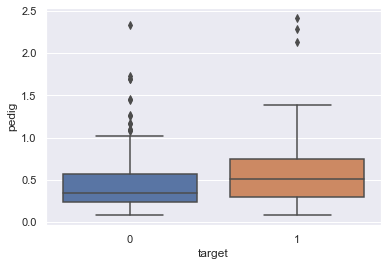

In [388]:
sns.boxplot(x='target', y='pedig', data=df);

In [389]:
dftrain=df.copy()
dftest = pd.read_csv('pima_test.csv')


In [390]:
dftest.head()

,numpreg,pgc,bldpres,triceps,serumins,bmi,pedig,age,target
0,4,154.0,62.0,31.0,284.0,32.8,0.237,23,0
1,6,134.0,70.0,23.0,130.0,35.4,0.542,29,1
2,4,118.0,70.0,NaN,NaN,44.5,0.904,26,0
3,5,162.0,104.0,NaN,NaN,37.7,0.151,52,1
4,0,102.0,86.0,17.0,105.0,29.3,0.695,27,0


In [391]:
columns_in_use = ['numpreg', 'pgc', 'bldpres', 'triceps', 'serumins', 'bmi', 'pedig', 'age']
y_train = dftrain['target']
X_train = dftrain[columns_in_use]
y_test = dftest['target']
X_test = dftest[columns_in_use]

In [392]:
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.linear_model import LogisticRegression

In [393]:
from imblearn.pipeline import Pipeline as pipe_imb

In [394]:
# Import libraries
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as pipe_imb
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import classification_report_imbalanced
from imblearn.pipeline import make_pipeline as make_pipeline_imb

### Mean/Median imputation
Many features have right skewed distribution therefore I choosed median for imputation

In [395]:
pipe = Pipeline([('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
                 ('scaler',  StandardScaler()),
                 ('clf',     LogisticRegression(random_state=42))])

params = [{'clf__C'           : np.arange(0.1, 2.0, 0.05), 
           'clf__penalty'     : ['l1'], 
           'clf__solver'      : ['liblinear', 'saga']},
          
          {'clf__C'           : np.arange(0.1, 2.0, 0.05), 
           'clf__penalty'     : ['l2'], 
           'clf__solver'      : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']}]

skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
grid = GridSearchCV(pipe, param_grid=params, cv=skf, n_jobs=-1 , verbose=1)

grid.fit(X_train, y_train)

print(grid.best_estimator_,'\n')
test_score = grid.score(X_test, y_test)
print('Training accuracy:', grid.score(X_train, y_train))
print('Test accuracy    :', test_score)

Fitting 5 folds for each of 266 candidates, totalling 1330 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:   22.1s


Pipeline(memory=None,
         steps=[('imputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 LogisticRegression(C=0.1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=42,
                                    solver='newton-cg', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False) 

Training accuracy: 0.7858472998137802
Test accuracy    : 0.7402597402597403


[Parallel(n_jobs=-1)]: Done 1330 out of 1330 | elapsed:   30.9s finished


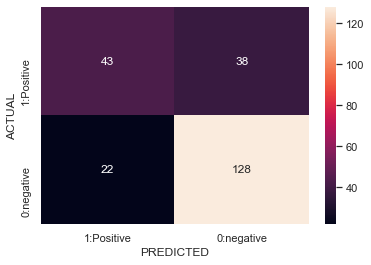


               precision    recall  f1-score   support

           0       0.77      0.85      0.81       150
           1       0.66      0.53      0.59        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231



In [396]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, roc_auc_score, precision_recall_curve
from sklearn.metrics import f1_score, fbeta_score, accuracy_score, classification_report, average_precision_score

def draw_cm(actual, predicted):
    cm = confusion_matrix(actual, predicted, [1,0])
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = ["1:Positive", "0:negative"] , 
                yticklabels = ["1:Positive", "0:negative"] )
    plt.ylabel('ACTUAL')
    plt.xlabel('PREDICTED')
    plt.show()
draw_cm( y_test, grid.predict(X_test) )
print('\n',classification_report(y_test, grid.predict(X_test)))

In [397]:
#I added sampler to pipeline because there is a imblance data. However accuracy did not get better. 

SMOTEENN_pipe = pipe_imb(steps=[('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
                           ('scaler',  StandardScaler()),
                           ('sampler', SMOTEENN(enn=EditedNearestNeighbours(), random_state=42)),
                           ('clf', LogisticRegression(random_state=42))])

params = [{'clf__C'           : np.arange(0.1, 2.0, 0.05), 
           'clf__penalty'     : ['l1'], 
           'clf__solver'      : ['liblinear', 'saga'],
           'sampler__sampling_strategy': [0.6, 0.7, 0.8, 1.0],
           'sampler__enn__n_neighbors': [5, 7, 8, 9,10] },
          
          {'clf__C'           : np.arange(0.1, 2.0, 0.05), 
           'clf__penalty'     : ['l2'], 
           'clf__solver'      : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
           'sampler__sampling_strategy': [0.6, 0.7, 0.8, 1.0],
           'sampler__enn__n_neighbors': [5, 7, 8, 9,10]},
         ]

kfold = StratifiedKFold(n_splits = 5, random_state = 42) # train/validation with the same ratio of classes

grids = GridSearchCV(SMOTEENN_pipe, param_grid=params, cv=kfold, n_jobs=-1 , verbose=1)

grids.fit(X_train, y_train)

print(grids.best_estimator_,'\n')
test_score = grids.score(X_test, y_test)
print('Training accuracy:', grids.score(X_train, y_train))
print('Test accuracy    :', test_score)

Fitting 5 folds for each of 5320 candidates, totalling 26600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 990 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 2490 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done 4590 tasks      | elapsed:   58.2s
[Parallel(n_jobs=-1)]: Done 7290 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 10590 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 14490 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 18990 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 24090 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 26600 out of 26600 | elapsed:  6.0min finished


Pipeline(memory=None,
         steps=[('imputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sampler',
                 SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all',
                                                      n_jobs=None,
                                                      n_neighbors=5,
                                                      sampling_strategy='auto'),
                          n_jobs=None, random_state=42, sampling_strategy=1.0,
                          smote=None)),
                ('clf',
                 LogisticRegression(C=0.3500000000000001, class_weight=None,
                                    dual=False, fit_intercept=True,
                                    intercept_scal

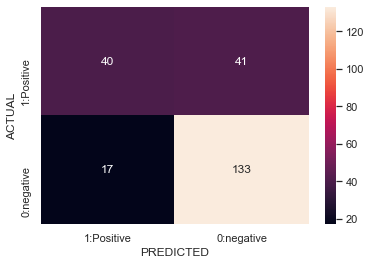


               precision    recall  f1-score   support

           0       0.76      0.89      0.82       150
           1       0.70      0.49      0.58        81

    accuracy                           0.75       231
   macro avg       0.73      0.69      0.70       231
weighted avg       0.74      0.75      0.74       231



In [398]:
draw_cm( y_test, grids.predict(X_test) )
print('\n',classification_report(y_test, grids.predict(X_test)))

### 2)the predictive methods in the Iterative Imputer of scikit-learn

### IterativeImputer BayesianRidge()

In [399]:
pipe = Pipeline([('imputer', IterativeImputer()),
                 ('scaler',  StandardScaler()),
                 ('clf',     LogisticRegression(random_state=42))])

params = [{'clf__C'           : np.arange(0.1, 2.0, 0.05), 
           'clf__penalty'     : ['l1'], 
           'clf__solver'      : ['liblinear', 'saga']},
          
          {'clf__C'           : np.arange(0.1, 2.0, 0.05), 
           'clf__penalty'     : ['l2'], 
           'clf__solver'      : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']}]

skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
grid = GridSearchCV(pipe, param_grid=params, cv=skf, n_jobs=-1, verbose=1)

grid.fit(X_train, y_train)

print(grid.best_estimator_,'\n')
test_score = grid.score(X_test, y_test)
print('Training accuracy:', grid.score(X_train, y_train))
print('Test accuracy    :', test_score)

Fitting 5 folds for each of 266 candidates, totalling 1330 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:   52.8s
[Parallel(n_jobs=-1)]: Done 1330 out of 1330 | elapsed:   56.6s finished


Pipeline(memory=None,
         steps=[('imputer',
                 IterativeImputer(add_indicator=False, estimator=None,
                                  imputation_order='ascending',
                                  initial_strategy='mean', max_iter=10,
                                  max_value=None, min_value=None,
                                  missing_values=nan, n_nearest_features=None,
                                  random_state=None, sample_posterior=False,
                                  skip_complete=False, tol=0.001, verbose=0)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 LogisticRegression(C=0.20000000000000004, class_weight=None,
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=100, multi_class='auto',
                           

In [400]:
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor

In [401]:
#I try these imputers in order
#DecisionTreeRegressor(max_features='sqrt', random_state=0),
#ExtraTreesRegressor(n_estimators=10, random_state=0),
#KNeighborsRegressor(n_neighbors=15)

### IterativeImputer - DecisionTreeRegressor

In [402]:
pipe = Pipeline([('imputer', IterativeImputer(random_state=42,
                                              estimator=DecisionTreeRegressor(max_features='sqrt', random_state=42))),
                 ('scaler',  StandardScaler()),
                 ('clf',     LogisticRegression(random_state=42))])

params = [{'clf__C'           : np.arange(0.1, 2.0, 0.05), 
           'clf__penalty'     : ['l1'], 
           'clf__solver'      : ['liblinear', 'saga']},
          
          {'clf__C'           : np.arange(0.1, 2.0, 0.05), 
           'clf__penalty'     : ['l2'], 
           'clf__solver'      : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']}]

skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
grid = GridSearchCV(pipe, param_grid=params, cv=skf, n_jobs=-1, verbose=1)

grid.fit(X_train, y_train)

print(grid.best_estimator_,'\n')
test_score = grid.score(X_test, y_test)
print('Training accuracy:', grid.score(X_train, y_train))
print('Test accuracy    :', test_score)

Fitting 5 folds for each of 266 candidates, totalling 1330 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   43.9s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1330 out of 1330 | elapsed:  2.3min finished


Pipeline(memory=None,
         steps=[('imputer',
                 IterativeImputer(add_indicator=False,
                                  estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                  criterion='mse',
                                                                  max_depth=None,
                                                                  max_features='sqrt',
                                                                  max_leaf_nodes=None,
                                                                  min_impurity_decrease=0.0,
                                                                  min_impurity_split=None,
                                                                  min_samples_leaf=1,
                                                                  min_samples_split=2,
                                                                  min_weight_fraction_leaf=0.0,
                      

### IterativeImputer - ExtraTreesRegressor

In [403]:
pipe = Pipeline([('imputer', IterativeImputer(random_state=42,
                                              estimator=ExtraTreesRegressor(n_estimators=10, random_state=42))),
                 ('scaler',  StandardScaler()),
                 ('clf',     LogisticRegression(random_state=42))])

params = [{'clf__C'           : np.arange(0.1, 2.0, 0.05), 
           'clf__penalty'     : ['l1'], 
           'clf__solver'      : ['liblinear', 'saga']},
          
          {'clf__C'           : np.arange(0.1, 2.0, 0.05), 
           'clf__penalty'     : ['l2'], 
           'clf__solver'      : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']}]

skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
grid = GridSearchCV(pipe, param_grid=params, cv=skf, n_jobs=-1, verbose=1)

grid.fit(X_train, y_train)

print(grid.best_estimator_,'\n')
test_score = grid.score(X_test, y_test)
print('Training accuracy:', grid.score(X_train, y_train))
print('Test accuracy    :', test_score)

Fitting 5 folds for each of 266 candidates, totalling 1330 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 1330 out of 1330 | elapsed: 19.6min finished


Pipeline(memory=None,
         steps=[('imputer',
                 IterativeImputer(add_indicator=False,
                                  estimator=ExtraTreesRegressor(bootstrap=False,
                                                                ccp_alpha=0.0,
                                                                criterion='mse',
                                                                max_depth=None,
                                                                max_features='auto',
                                                                max_leaf_nodes=None,
                                                                max_samples=None,
                                                                min_impurity_decrease=0.0,
                                                                min_impurity_split=None,
                                                                min_samples_leaf=1,
                                                          

In [404]:
pipe = Pipeline([('imputer', IterativeImputer(random_state=42,
                                              estimator=KNeighborsRegressor())),
                 ('scaler',  StandardScaler()),
                 ('clf',     LogisticRegression(random_state=42))])

params = [{'clf__C'           : np.arange(0.1, 2.0, 0.05), 
           'clf__penalty'     : ['l1'], 
           'clf__solver'      : ['liblinear', 'saga'],
           'imputer__estimator__n_neighbors':[5,7,9,11]},
          
          {'clf__C'           : np.arange(0.1, 2.0, 0.05), 
           'clf__penalty'     : ['l2'], 
           'clf__solver'      : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
           'imputer__estimator__n_neighbors':[5,7,9,11]}]

skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
grid = GridSearchCV(pipe, param_grid=params, cv=skf, n_jobs=-1, verbose=1)

grid.fit(X_train, y_train)

print(grid.best_estimator_,'\n')
test_score = grid.score(X_test, y_test)
print('Training accuracy:', grid.score(X_train, y_train))
print('Test accuracy    :', test_score)

Fitting 5 folds for each of 1064 candidates, totalling 5320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   45.4s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 5320 out of 5320 | elapsed:  8.9min finished


Pipeline(memory=None,
         steps=[('imputer',
                 IterativeImputer(add_indicator=False,
                                  estimator=KNeighborsRegressor(algorithm='auto',
                                                                leaf_size=30,
                                                                metric='minkowski',
                                                                metric_params=None,
                                                                n_jobs=None,
                                                                n_neighbors=7,
                                                                p=2,
                                                                weights='uniform'),
                                  imputation_order='ascending',
                                  initial_strategy='mean', max_iter=10,
                                  max_value=None, min_value=None,
                                  missing_values=nan, n_

In [405]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
numpreg,537.0,3.919926,3.350083,0.000,1.000,3.000,6.000,17.00
pgc,532.0,121.421053,30.119276,57.000,99.000,117.000,139.000,198.00
bldpres,512.0,72.003906,12.180636,30.000,64.000,72.000,80.000,110.00
triceps,391.0,28.785166,10.018183,7.000,21.000,29.000,36.000,63.00
serumins,294.0,152.670068,117.592444,14.000,74.250,125.000,184.750,846.00
bmi,527.0,32.386148,6.996717,18.200,27.300,32.400,36.600,67.10
pedig,537.0,0.483348,0.335318,0.078,0.254,0.395,0.637,2.42
age,537.0,33.132216,11.787263,21.000,24.000,29.000,40.000,81.00
target,537.0,0.348231,0.476854,0.000,0.000,0.000,1.000,1.00


In [406]:
df2train=pd.DataFrame(dftrain)
df2test=pd.DataFrame(dftest)

In [407]:
df2train.head()

,numpreg,pgc,bldpres,triceps,serumins,bmi,pedig,age,target
0,4,151.0,90.0,38.0,NaN,29.7,0.294,36,0
1,4,116.0,72.0,12.0,87.0,22.1,0.463,37,0
2,6,92.0,62.0,32.0,126.0,32.0,0.085,46,0
3,9,57.0,80.0,37.0,NaN,32.8,0.096,41,0
4,3,81.0,86.0,16.0,66.0,27.5,0.306,22,0


### 3)a variable to indicate missingness

In [408]:
#I create new columns in both df2train and df2test for for missing values. 
missing_columns=["pgc",'bldpres','triceps','serumins','bmi']
new_columns=["pgc_mis",'bldpres_mis','triceps_mis','serumins_mis','bmi_mis']
df2train['pgc_mis']=1
df2train['bldpres_mis']=1
df2train['triceps_mis']=1
df2train['serumins_mis']=1
df2train['bmi_mis']=1
df2test['pgc_mis']=1
df2test['bldpres_mis']=1
df2test['triceps_mis']=1
df2test['serumins_mis']=1
df2test['bmi_mis']=1

In [409]:
df2train.head()

,numpreg,pgc,bldpres,triceps,serumins,bmi,pedig,age,target,pgc_mis,bldpres_mis,triceps_mis,serumins_mis,bmi_mis
0,4,151.0,90.0,38.0,NaN,29.7,0.294,36,0,1,1,1,1,1
1,4,116.0,72.0,12.0,87.0,22.1,0.463,37,0,1,1,1,1,1
2,6,92.0,62.0,32.0,126.0,32.0,0.085,46,0,1,1,1,1,1
3,9,57.0,80.0,37.0,NaN,32.8,0.096,41,0,1,1,1,1,1
4,3,81.0,86.0,16.0,66.0,27.5,0.306,22,0,1,1,1,1,1


In [413]:
#if a column in df2train has a value, new categoric columns of this columns has 1 value. By this way, new categoric columns become 0 values for missing.
for col in range(len(missing_columns)):
    for i in df2train.index[df2train[missing_columns[col]].isnull()].tolist():
        df2train[new_columns[col]][i]=0 

In [414]:
#I make this transaction both train and test data. 
for col in range(len(missing_columns)):
    for i in df2test.index[df2test[missing_columns[col]].isnull()].tolist():
        df2test[new_columns[col]][i]=0

In [415]:
df2test.head()

,numpreg,pgc,bldpres,triceps,serumins,bmi,pedig,age,target,pgc_mis,bldpres_mis,triceps_mis,serumins_mis,bmi_mis
0,4,154.0,62.0,31.0,284.0,32.8,0.237,23,0,1,1,1,1,1
1,6,134.0,70.0,23.0,130.0,35.4,0.542,29,1,1,1,1,1,1
2,4,118.0,70.0,NaN,NaN,44.5,0.904,26,0,1,1,0,0,1
3,5,162.0,104.0,NaN,NaN,37.7,0.151,52,1,1,1,0,0,1
4,0,102.0,86.0,17.0,105.0,29.3,0.695,27,0,1,1,1,1,1


In [416]:
columns_in_use_mis = ['numpreg', 'pgc', 'bldpres', 'triceps', 'serumins', 'bmi', 'pedig', 'age','pgc_mis','bldpres_mis','triceps_mis','serumins_mis','bmi_mis']
y2_train = df2train['target']
X2_train = df2train[columns_in_use_mis]
y2_test = df2test['target']
X2_test = df2test[columns_in_use_mis]

In [417]:
X2_train.head()

,numpreg,pgc,bldpres,triceps,serumins,bmi,pedig,age,pgc_mis,bldpres_mis,triceps_mis,serumins_mis,bmi_mis
0,4,151.0,90.0,38.0,NaN,29.7,0.294,36,1,1,1,0,1
1,4,116.0,72.0,12.0,87.0,22.1,0.463,37,1,1,1,1,1
2,6,92.0,62.0,32.0,126.0,32.0,0.085,46,1,1,1,1,1
3,9,57.0,80.0,37.0,NaN,32.8,0.096,41,1,1,1,0,1
4,3,81.0,86.0,16.0,66.0,27.5,0.306,22,1,1,1,1,1


In [418]:
# Convert to categorical variables in both train and test dataframe
df2train.pgc_mis = df2train.pgc_mis.astype('category')
df2train.bldpres_mis = df2train.bldpres_mis.astype('category')
df2train.triceps_mis = df2train.triceps_mis.astype('category')
df2train.serumins_mis = df2train.serumins_mis.astype('category')
df2train.bmi_mis = df2train.bmi_mis.astype('category')
df2test.pgc_mis = df2test.pgc_mis.astype('category')
df2test.bldpres_mis = df2test.bldpres_mis.astype('category')
df2test.triceps_mis = df2test.triceps_mis.astype('category')
df2test.serumins_mis = df2test.serumins_mis.astype('category')
df2test.bmi_mis = df2test.bmi_mis.astype('category')

In [420]:
from sklearn.compose import ColumnTransformer
num_transformer = Pipeline(steps=[('imputer', SimpleImputer(missing_values=np.nan, strategy='constant',fill_value=900)),
                                    ('scaler', StandardScaler())
                                 ])
num_attrs = X2_train.columns[X2_train.dtypes != 'category'].tolist()

preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_attrs)],
                                 remainder = 'passthrough') 

In [422]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('clf',   LogisticRegression(random_state=42))])

params = [{'clf__C'           : np.arange(0.1, 2.0, 0.05), 
           'clf__penalty'     : ['l1'], 
           'clf__solver'      : ['liblinear', 'saga']},
          
          {'clf__C'           : np.arange(0.1, 2.0, 0.05), 
           'clf__penalty'     : ['l2'], 
           'clf__solver'      : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']}]

skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
grid = GridSearchCV(pipeline, param_grid=params, cv=skf, n_jobs=-1 , verbose=1)

grid.fit(X2_train, y2_train)

print(grid.best_estimator_,'\n')
test_score = grid.score(X2_test, y2_test)
print('Training accuracy:', grid.score(X2_train, y2_train))
print('Test accuracy    :', test_score)

Fitting 5 folds for each of 266 candidates, totalling 1330 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 1215 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done 1330 out of 1330 | elapsed:   34.4s finished


Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=900,
                                                                                 missing_values=nan,
                                                                                 strategy='constant',
                                                     

In [425]:
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.metrics import fbeta_score, make_scorer

In [428]:
SMOTEENN_pipe = pipe_imb([('preprocessor', preprocessor), 
                          ('sampler', SMOTEENN(enn=EditedNearestNeighbours(), random_state=42)),
                          ('clf'    , LogisticRegression(random_state=42))])


params = [{'clf__C'           : np.arange(0.1, 2.0, 0.05), 
           'clf__penalty'     : ['l1'], 
           'clf__solver'      : ['liblinear', 'saga'],
           'sampler__sampling_strategy': [0.6, 0.7, 0.8, 1.0],
           'sampler__enn__n_neighbors': [5, 7, 8, 9,10] },
          
          {'clf__C'           : np.arange(0.1, 2.0, 0.05), 
           'clf__penalty'     : ['l2'], 
           'clf__solver'      : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
           'sampler__sampling_strategy': [0.6, 0.7, 0.8, 1.0],
           'sampler__enn__n_neighbors': [5, 7, 8, 9,10]},
         ]

kfold = StratifiedKFold(n_splits = 5, random_state = 42) # train/validation with the same ratio of classes

grids = GridSearchCV(SMOTEENN_pipe, param_grid=params, cv=kfold, n_jobs=-1 , verbose=1)

grids.fit(X2_train, y2_train)

print(grids.best_estimator_,'\n')
test_score = grids.score(X2_test, y2_test)
print('Training accuracy:', grids.score(X2_train, y2_train))
print('Test accuracy    :', test_score)

Fitting 5 folds for each of 5320 candidates, totalling 26600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 1744 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 3144 tasks      | elapsed:   50.5s
[Parallel(n_jobs=-1)]: Done 4944 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 7144 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 9744 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 12744 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 16144 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 19944 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 24144 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 26600 out of 26600 | elapsed:  7.6min finished


Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=900,
                                                                                 missing_values=nan,
                                                                                 strategy='constant',
                                                     